# Day 4 Activities
Dokyun Kim  
02/03/2026

## Problem 1: Day Exercises

### Exercise 1:
Write the form of the covariance matrix for a 3-variable system. What is the dimension of the covariance matrix?

$$ \left[
\begin{array}{ccc}
Cov(X,X) & Cov(X,Y) & Cov(X,Z) \\
Cov(Y,X) & Cov(Y,Y) & Cov(Y,Z) \\
Cov(Z,X) & Cov(Z,Y) & Cov(Z,Z)
\end{array}
\right] $$

It is a 3 x 3 matrix.

### Exercise 2 & 3:
Implement your own covariance function (python suggested) based on these notes. Then, apply your function to the two Examples on the documentation page. Compare your output with np.cov. Do you get the same answers?  

The numbers provided in the covariance matrix are “machine readable” but not always intuitive for human interpretation. A correlation coefficient matrix provides a normalized measurement, with values always between -1 and 1, sometimes useful for interpretation. Read through the numpy documentation for the corrcoef function and implement your own version on the problem you just completed.



In [7]:
import numpy as np

X1 = np.array([[0, 2], [1, 1], [2, 0]]).T
x = [-2.1, -1,  4.3]
y = [3,  1.1,  0.12]
X2 = np.stack((x, y), axis=0)

X3  = np.array([[0.77395605, 0.43887844, 0.85859792],
       [0.69736803, 0.09417735, 0.97562235],
       [0.7611397 , 0.78606431, 0.12811363]])
       
X4 = np.array([[0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 ],
       [0.22723872, 0.55458479, 0.06381726]])

def my_cov(m):
    means = np.mean(m, axis=1)
    sub_mean = m - means[:, None]
    prod = sub_mean@sub_mean.T
    prod_norm = prod / (m.shape[1]-1)
    return prod_norm

def my_corrcoef(m):
    C = my_cov(m)
    diag = np.diag(C)[:, None]
    denom = np.sqrt(diag@diag.T)
    corrcoef = np.divide(C, denom)
    return corrcoef

print(f"Numpy cov(): \n {np.cov(X1)}")
print(f"My cov(): \n {my_cov(X1)}")

print(f"Numpy cov(): \n {np.cov(X2)}")
print(f"My cov(): \n {my_cov(X2)}")

print(f"Numpy corrcoef(): \n {np.corrcoef(X3)}")
print(f"My corrcoef(): \n {my_corrcoef(X3)}")

print(f"Numpy corrcoef(): \n {np.corrcoef(X4)}")
print(f"My corrcoef(): \n {my_corrcoef(X4)}")

Numpy cov(): 
 [[ 1. -1.]
 [-1.  1.]]
My cov(): 
 [[ 1. -1.]
 [-1.  1.]]
Numpy cov(): 
 [[11.71       -4.286     ]
 [-4.286       2.14413333]]
My cov(): 
 [[11.71       -4.286     ]
 [-4.286       2.14413333]]
Numpy corrcoef(): 
 [[ 1.          0.99256089 -0.68080987]
 [ 0.99256089  1.         -0.76492173]
 [-0.68080987 -0.76492173  1.        ]]
My corrcoef(): 
 [[ 1.          0.99256089 -0.68080987]
 [ 0.99256089  1.         -0.76492173]
 [-0.68080987 -0.76492173  1.        ]]
Numpy corrcoef(): 
 [[ 1.         -0.93657855 -0.83571711]
 [-0.93657855  1.          0.97517215]
 [-0.83571711  0.97517215  1.        ]]
My corrcoef(): 
 [[ 1.         -0.93657855 -0.83571711]
 [-0.93657855  1.          0.97517215]
 [-0.83571711  0.97517215  1.        ]]


## Problem 2: Working with real data

In [8]:
import pandas as pd

imu_df = pd.read_csv("imu1.csv") 
vicon_df = pd.read_csv("vi1.csv")  

### Part A: Exploring the Data
Using matplotlib (or plotting library of your choice), generate a few plots of the data. At minimum, please produce plots of IMU attitude over time, Vicon attitude over time, IMU magnetic field over time, and IMU gravity over time. Consider also making a few direct comparison plots. At minimum, I suggest producing IMU attitude vs Vicon attitude. Don’t forget labels, legends, and titles for your plots.

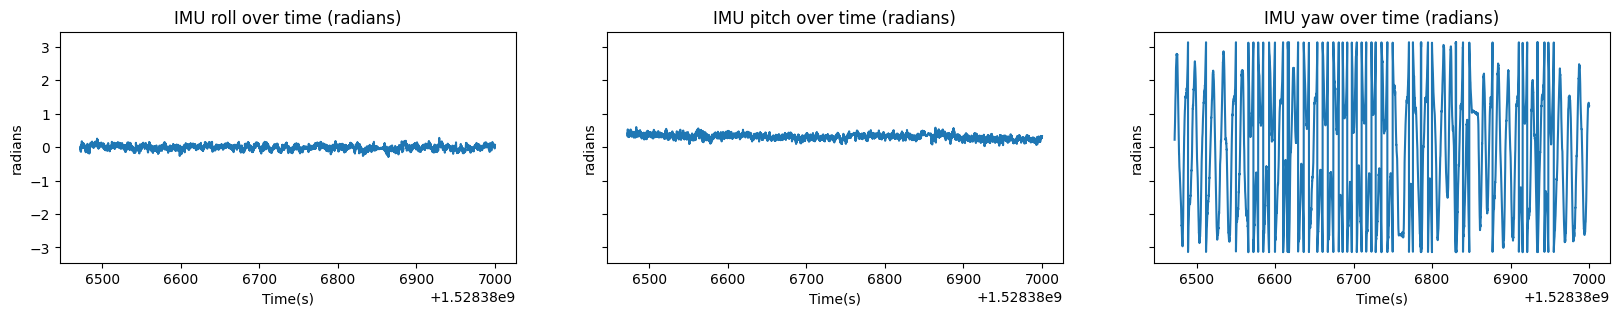

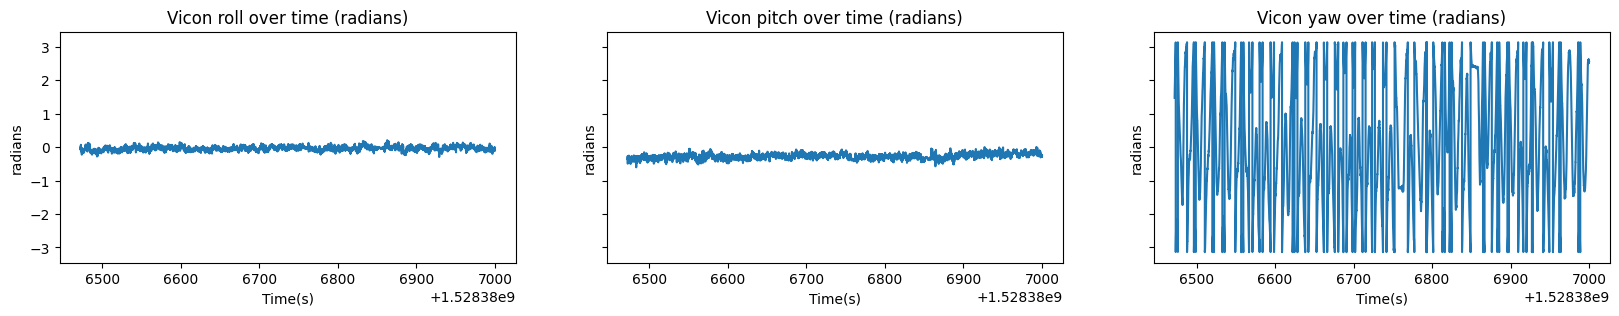

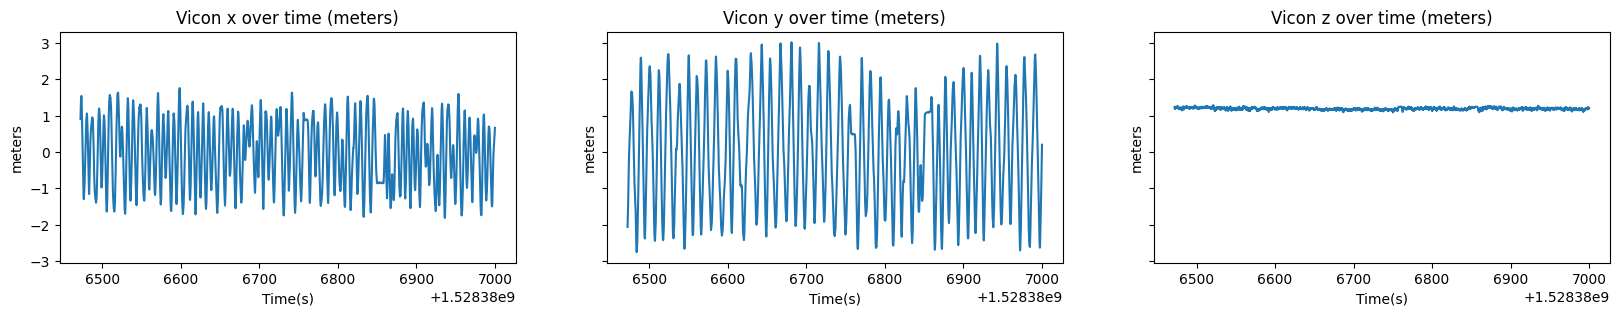

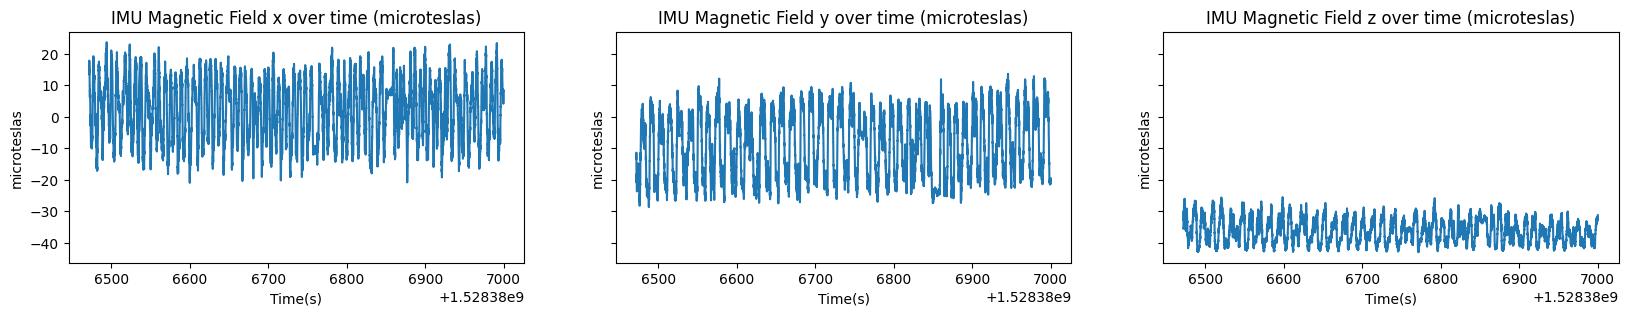

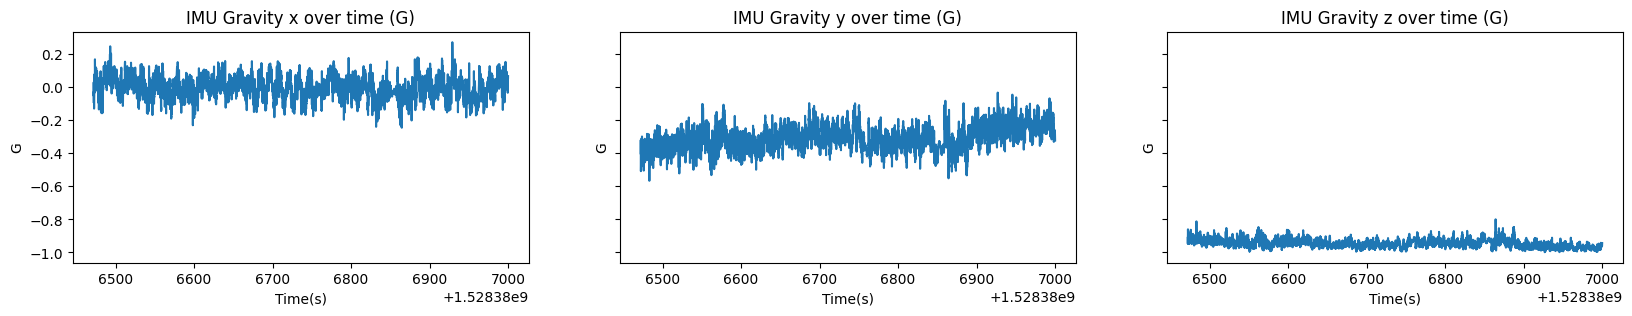

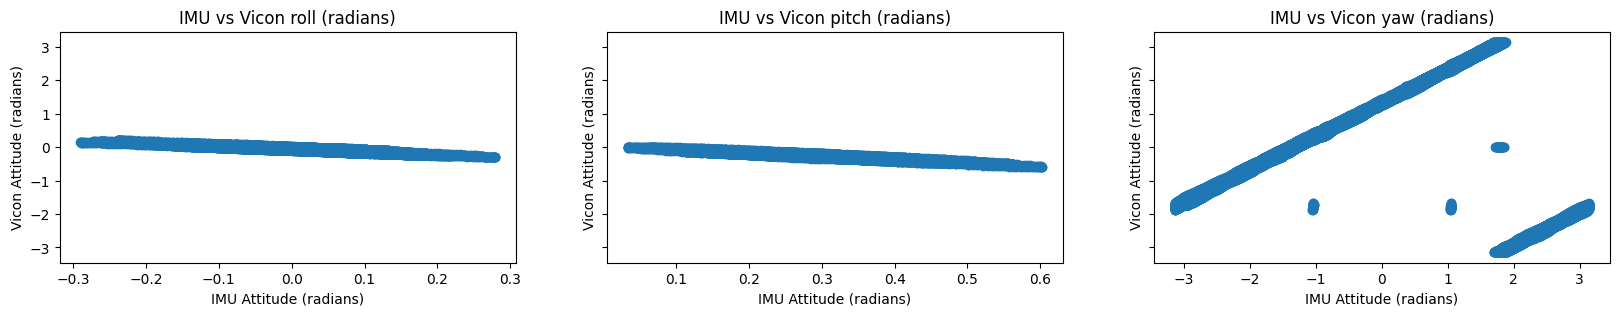

In [9]:
import matplotlib.pyplot as plt
IMU_TIME = imu_df.Time
VICON_TIME = vicon_df.Time

# IMU Attitudes
rpy_labels = ['roll', 'pitch', 'yaw']
fig, axs = plt.subplots(1,3,figsize=(20,3), sharey=True)
for i, label in enumerate(rpy_labels):
    axs[i].plot(IMU_TIME, imu_df[f'attitude_{label}_radians'], label = f"{label}_radians")
    axs[i].set_xlabel("Time(s)")
    axs[i].set_ylabel("radians")
    axs[i].set_title(f"IMU {label} over time (radians)")
plt.show()

# Vicon Attitudes
fig, axs = plt.subplots(1,3,figsize=(20,3), sharey=True)
rpy_labels = ['roll', 'pitch', 'yaw']
for i, label in enumerate(rpy_labels):
    axs[i].plot(VICON_TIME, vicon_df[label], label = f"{label}_radians")
    axs[i].set_xlabel("Time(s)")
    axs[i].set_ylabel("radians")
    axs[i].set_title(f"Vicon {label} over time (radians)")
plt.show()

# Vicon Positions
fig, axs = plt.subplots(1,3,figsize=(20,3), sharey=True)
rpy_labels = ['x', 'y', 'z']
for i, label in enumerate(rpy_labels):
    axs[i].plot(VICON_TIME, vicon_df[f"translation_{label}"], label = f"translation_{label}")
    axs[i].set_xlabel("Time(s)")
    axs[i].set_ylabel("meters")
    axs[i].set_title(f"Vicon {label} over time (meters)")
plt.show()

# IMU Magnetic Field
fig, axs = plt.subplots(1,3,figsize=(20,3), sharey=True)
mf_labels = ['x', 'y', 'z']
for i, label in enumerate(mf_labels):
    axs[i].plot(IMU_TIME, imu_df[f'magnetic_field_{label}_microteslas'], label = f"magnetic_field_{label}_microteslas")
    axs[i].set_xlabel("Time(s)")
    axs[i].set_ylabel("microteslas")
    axs[i].set_title(f"IMU Magnetic Field {label} over time (microteslas)")
plt.show()

# IMU Gravity
fig, axs = plt.subplots(1,3,figsize=(20,3), sharey=True)
gr_labels = ['x', 'y', 'z']
for i, label in enumerate(gr_labels):
    axs[i].plot(IMU_TIME, imu_df[f"gravity_{label}_G"], label= f"gravity_{label}_G")
    axs[i].set_xlabel("Time(s)")
    axs[i].set_ylabel("G")
    axs[i].set_title(f"IMU Gravity {label} over time (G)")
plt.show()

# IMU Attitude vs Vicon Attitude
fig, axs = plt.subplots(1,3,figsize=(20,3), sharey=True)
rpy_labels = ['roll', 'pitch', 'yaw']
for i, label in enumerate(rpy_labels):
    axs[i].scatter(imu_df[f'attitude_{label}_radians'], vicon_df[label], label = f"{label}_radians")
    axs[i].set_xlabel("IMU Attitude (radians)")
    axs[i].set_ylabel("Vicon Attitude (radians)")
    axs[i].set_title(f"IMU vs Vicon {label} (radians)")

## Part B: Comparing IMU Axes
Let’s start computing some relational covariances and correlation coefficients and see what they tell us. An Inertial Measurement Unit (IMU) is several sensors wrapped into a single package, and to begin, it would be interesting to see how these sensors align with one another. Compute the covariance and correlation coefficient matrices for the following:

- acceleration in all three axes (x, y, z)
- attitude in all three axes (yaw, pitch, roll)
- rate of rotation in all three axes (yaw, pitch roll)
- gravity, magnetic field, and acceleration for each of the three axes (x, y, z)
- rate of rotation and acceleration for each of the three axes (x, y, z)

In [10]:
ACCL = np.stack([imu_df.user_acc_x_G, imu_df.user_acc_y_G, imu_df.user_acc_z_G])
ALT = np.stack([imu_df.attitude_roll_radians, imu_df.attitude_pitch_radians, imu_df.attitude_yaw_radians])
ROR = np.stack([imu_df.rotation_rate_x_rad_per_sec, imu_df.rotation_rate_y_rad_per_sec, imu_df.rotation_rate_z_rad_per_s])
G_MF_ACCL_X = np.stack([imu_df.gravity_x_G, imu_df.magnetic_field_x_microteslas , imu_df.user_acc_x_G])
G_MF_ACCL_Y = np.stack([imu_df.gravity_y_G, imu_df.magnetic_field_y_microteslas , imu_df.user_acc_y_G])
G_MF_ACCL_Z = np.stack([imu_df.gravity_z_G, imu_df.magnetic_field_z_microteslas , imu_df.user_acc_z_G])
ROR_ACCL_X = np.stack([imu_df.rotation_rate_x_rad_per_sec, imu_df.user_acc_x_G])
ROR_ACCL_Y = np.stack([imu_df.rotation_rate_y_rad_per_sec, imu_df.user_acc_y_G])
ROR_ACCL_Z = np.stack([imu_df.rotation_rate_z_rad_per_s, imu_df.user_acc_z_G])

MATS = [("Acceleration", ACCL),
        ("Attitude", ALT),
        ("Rate of Rotation", ROR),
        ("Gravity, Magnetic Field, Acceleration X", G_MF_ACCL_X),
        ("Gravity, Magnetic Field, Acceleration Y", G_MF_ACCL_Y),
        ("Gravity, Magnetic Field, Acceleration Z", G_MF_ACCL_Z),
        ("Rate of Rotation and Acceleration X", ROR_ACCL_X),
        ("Rate of Rotation and Acceleration Y", ROR_ACCL_Y),
        ("Rate of Rotation and Acceleration Z", ROR_ACCL_Z)]

for m in MATS:
    name, mat = m
    cov = my_cov(mat)
    corr = my_corrcoef(mat)
    print(f"{name} Covariance Matrix: \n {cov}")
    print(f"{name} Correlation Coefficient Matrix: \n {corr} \n")

Acceleration Covariance Matrix: 
 [[ 2.26456107e-02 -4.71148351e-03 -5.26712019e-05]
 [-4.71148351e-03  1.35404957e-02 -1.05112843e-03]
 [-5.26712019e-05 -1.05112843e-03  4.04986117e-02]]
Acceleration Correlation Coefficient Matrix: 
 [[ 1.         -0.26905953 -0.00173925]
 [-0.26905953  1.         -0.04488678]
 [-0.00173925 -0.04488678  1.        ]] 

Attitude Covariance Matrix: 
 [[ 4.69720699e-03 -7.82262882e-04 -1.45880596e-04]
 [-7.82262882e-04  5.64988258e-03  8.02045917e-03]
 [-1.45880596e-04  8.02045917e-03  3.20040253e+00]]
Attitude Correlation Coefficient Matrix: 
 [[ 1.         -0.15184943 -0.0011898 ]
 [-0.15184943  1.          0.05964544]
 [-0.0011898   0.05964544  1.        ]] 

Rate of Rotation Covariance Matrix: 
 [[ 0.28665589 -0.0680202   0.08761712]
 [-0.0680202   0.294176    0.23758535]
 [ 0.08761712  0.23758535  0.87575282]]
Rate of Rotation Correlation Coefficient Matrix: 
 [[ 1.         -0.23423613  0.17487099]
 [-0.23423613  1.          0.46808559]
 [ 0.17487099

## Part C: Comparing IMU with Vicon Ground Truth 
Now let’s have a look at IMU and Vicon alignment. There are three overlapping measurements taken by the IMU (direct measurement) and the vicon system (derived measurement from rotation, which is a direct measurement): yaw, pitch, and roll. Compute the relational covariance and correlation coefficient matrices between each corresponding axis (e.g., vicon yaw vs imu yaw, vicon roll vs imu roll, etc.).  

Please also generate a residual plot (IMU measurements subtracted from the Vicon data), and compute a mean and variance over the residuals. Comment on the relationship between the residual mean and variance, and the relational covariances. What different information is captured in these analyses?

In [11]:
# Compute the Covariance and Correlation Coefficients
IMU_VICON_ROLL = np.stack([imu_df.attitude_roll_radians, vicon_df.roll])
IMU_VICON_PITCH = np.stack([imu_df.attitude_pitch_radians, vicon_df.pitch])
IMU_VICON_YAW = np.stack([imu_df.attitude_yaw_radians, vicon_df.yaw])

MATS = [("IMU vs Vicon Roll", IMU_VICON_ROLL),
        ("IMU vs Vicon Pitch", IMU_VICON_PITCH),
        ("IMU vs Vicon Yaw", IMU_VICON_YAW)]

for m in MATS:
    name, mat = m
    cov = my_cov(mat)
    corr = my_corrcoef(mat)
    print(f"{name} Covariance Matrix: \n {cov}")
    print(f"{name} Correlation Coefficient Matrix: \n {corr} \n")

IMU vs Vicon Roll Covariance Matrix: 
 [[ 0.00469721 -0.00395212]
 [-0.00395212  0.00375064]]
IMU vs Vicon Roll Correlation Coefficient Matrix: 
 [[ 1.         -0.94157978]
 [-0.94157978  1.        ]] 

IMU vs Vicon Pitch Covariance Matrix: 
 [[ 0.00564988 -0.00551346]
 [-0.00551346  0.00582664]]
IMU vs Vicon Pitch Correlation Coefficient Matrix: 
 [[ 1.        -0.9609371]
 [-0.9609371  1.       ]] 

IMU vs Vicon Yaw Covariance Matrix: 
 [[3.20040253 0.4934338 ]
 [0.4934338  3.37645584]]
IMU vs Vicon Yaw Correlation Coefficient Matrix: 
 [[1.         0.15010531]
 [0.15010531 1.        ]] 



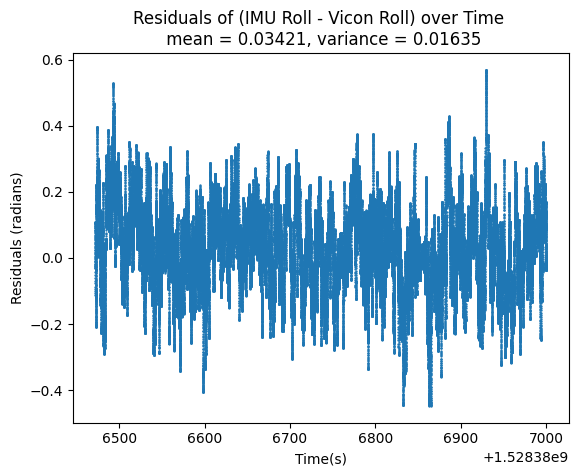

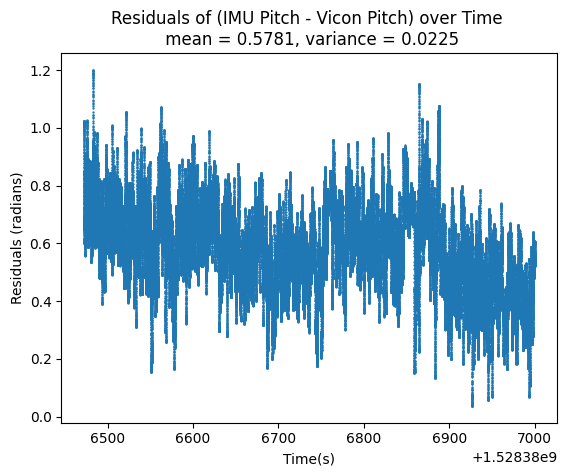

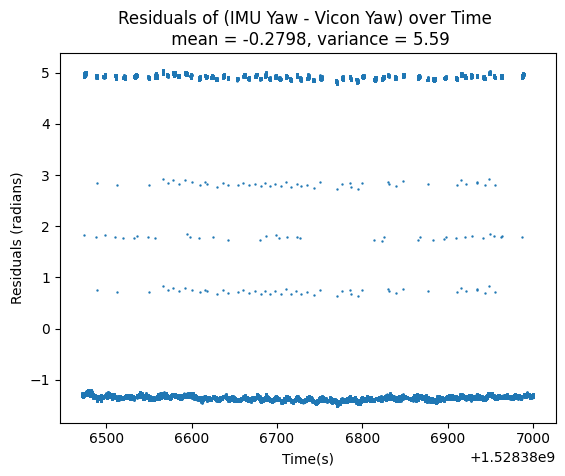

In [12]:
# Compute Residuals and their Mean and Variance
RES_ROLL = imu_df.attitude_roll_radians - vicon_df.roll
RES_ROLL_MEAN = np.mean(RES_ROLL)
RES_ROLL_VAR = np.var(RES_ROLL)

RES_PITCH = imu_df.attitude_pitch_radians - vicon_df.pitch
RES_PITCH_MEAN = np.mean(RES_PITCH)
RES_PITCH_VAR = np.var(RES_PITCH)

RES_YAW = imu_df.attitude_yaw_radians - vicon_df.yaw
RES_YAW_MEAN = np.mean(RES_YAW)
RES_YAW_VAR = np.var(RES_YAW)

plt.scatter(IMU_TIME, RES_ROLL, label="Roll Residuals", s=0.5)
plt.xlabel("Time(s)")
plt.ylabel("Residuals (radians)")
plt.title(f"Residuals of (IMU Roll - Vicon Roll) over Time \n mean = {RES_ROLL_MEAN:.4}, variance = {RES_ROLL_VAR:.4}")
plt.show()

plt.scatter(IMU_TIME, RES_PITCH, label="Pitch Residuals", s=0.5)
plt.xlabel("Time(s)")
plt.ylabel("Residuals (radians)")
plt.title(f"Residuals of (IMU Pitch - Vicon Pitch) over Time \n mean = {RES_PITCH_MEAN:.4}, variance = {RES_PITCH_VAR:.4}")
plt.show()

plt.scatter(IMU_TIME, RES_YAW, label="Yaw Residuals", s=0.5)
plt.xlabel("Time(s)")
plt.ylabel("Residuals (radians)")
plt.title(f"Residuals of (IMU Yaw - Vicon Yaw) over Time \n mean = {RES_YAW_MEAN:.4}, variance = {RES_YAW_VAR:.4}")
plt.show()

### Analysis 
The residual analysis provides information on the average error (mean) and the variability of that error (variance) in the IMU measurements. For example, a low mean suggests that the IMU measurements are close to the Vicon ground truth while low variance suggests that these errors are consistently small across all measurements.  

On the other hand, the covariance provides insight regarding the general trend between the IMU and Vicon measurements. While a high covariance indicates that the two datasets show similar trends, it fails to provide information on the actual magnitude of the errors. For example, if the IMU always recorded half of the ground truth value, the covariance would still be high, but there is significant error in the measurements.

## Part D: Today’s So What
For your last prompt, please consider the following:

- In Part B, you were using covariance and correlation coefficients to examine the relationships between different sensors. Comment on relationships that may (or may not) be surprising based on the data that you’re seeing. Feel free to make additional plots or diagrams to help visualize the data.  

- In Part C, you were analyzing relationships and thinking about model fit by computing residuals. What do your results tell you about the noise of the IMU? Consider: the linearity of the noise, the magnitude of the relational covariance, the sign of relational covariance, the magnitude of the residual variance, and the mean of the residuals. Is variance/covariance a good model of the sensor error? Why or why not?  

- Comment on how much we should trust the IMU when performing an inference update over the odometry of a robot. Are there axes that we can trust more than others?

### Part B reflection
In part B, we obsered that the correlation coefficients between rate of rotation (RoR) in the Y direction and Z axis were relatively high (~0.468). While this would've been surprising if we were simply calibrating the IMU unit, this observation makes sense in the context of the dataset. Since the dataset was collected while a person was walking, the natural motion of walking involves concurrent movements in multiple axes. When humans walk, there is often a simultaneous rotation in the Y and Z axes due to the swinging of arms and the rotation of the torso. This concurrent movement leads to a higher correlation between the RoR in these axes, as they are influenced by the same underlying motion patterns.

It was surprising to see the weak correlation between gravity and magnetic field across axis (~0.2). Since both gravity and magnetic field are mostly constant forces acting on the IMU, I expected a much stronger correlation between the two variables. However, the low correlation coefficient suggests that there may be significant noise in the measurements of the magnetic field. This claim can actually be supported by the graph in part A that shows the magnetic field measurements over time. This may be a sign of variability in the magnetic field readings, which could be due to environmental factors such as nearby electronic devices or metal objects that interfere with the magnetic field.

### Part C + IMU reflection
Looking at the relational covariance and residuals, we quickly notice that the IMU is more reliable in certain axes than others. The roll axis show high relational covariance (-0.9415), low residual mean (0.03421), and low residual variance (0.01635). This suggests that the IMU can be trusted with a high confidence in the roll axis. However, we should note that the negative sign of the relational covariance indicates that there is an strong inverse relationship between the IMU and Vicon measurements in this axis. While this is a surprising observation, it can be easily accounted for by fixing the orientation of the IMU during data processing. 

The pitch axis also show high relational covariance (-0.9609) and low residual variance (0.0225) but has a much higher residual mean (0.5781) compared to the roll axis. This suggests that while the IMU measurements in the pitch axis are consistently off from the Vicon ground truth, they still follow a similar trend. Since the high residual mean is a constant offset, it indicates a systematic bias in the IMU measurements in the pitch axis. This systematic bias can be corrected through calibration, making the IMU still reliable in this axis after adjustment.

The yaw axis shows the lowest relational covariance (0.15), high residual mean (-0.2798), and high residual variance (5.59). At first glance this may suggest that the IMU is not reliable in the yaw axis. However, upon further inspection of the data plots from part A, we can see that while the calculated values suggest low reliability, this is because of the wrap-around behavior of the yaw measurements. The yaw measurements from the IMU and Vicon show a clear wrap-around at PI, which can significantly affect the covariance and residual calculations. This wrap-around behavior can lead to large errors in the calculations, making it appear as though there is a low correlation and high variance. 

In conclusion, all 3 axes of the IMU can be trusted for reliable inference updates over the odometry of a robot.